In [53]:
# Import the necessary packages 
import splusdata 
import pandas as pd
import matplotlib.pyplot as plt
import aplpy
from astropy.io import fits
from astropy.wcs import WCS

In [54]:
# Connect
conn = splusdata.connect('Luis', 'plutarco*80') 

You have access to internal data


In [55]:
img = conn.twelve_band_img(316.4731956938531, -37.14456181858315, radius=80, noise=0.15, saturation=0.15)

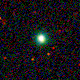

In [56]:
img

In [82]:
hdu = conn.get_cut(316.4731956938531, -37.14456181858315, 80, 'R')


In [92]:
hdu[1].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                   80 / length of data axis 1                          
NAXIS2  =                   80 / length of data axis 2                          
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
EQUINOX =        2000.00000000 / Mean equinox                                   
MJD-OBS =   5.834600000000E+04 / Modified Julian date at start                  
RADESYS = 'ICRS    '        

In [73]:
hdu.writeto('PN.fz', overwrite=True) # write to fits


In [93]:
def fz2fits(image):
    """
    It converts SPLUS images
    from .fz to .fits
    """
    datos = fits.open(image)[1].data
    heada = fits.open(image)[1].header
    imageout = image[:-2] + 'fits'
    print ('Creating file: ')
    print (imageout)
    fits.writeto(imageout, datos, heada, overwrite=True)

In [94]:
hdufits = fz2fits("PN.fz")
hdufits

Creating file: 
PN.fits


In [96]:
#hdul = fits.open("../3filter_noflat/spectra-simbad/PN-80_R.fits")[0]
hdul = fits.open("PN.fits")[0]
wcs = WCS(hdul.header)

In [97]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 315.849056667  -37.5086421111  
CRPIX : 3298.5  -2330.5  
CD1_1 CD1_2  : -0.0001527777777778  0.0  
CD2_1 CD2_2  : 0.0  0.0001527777777778  
NAXIS : 80  80

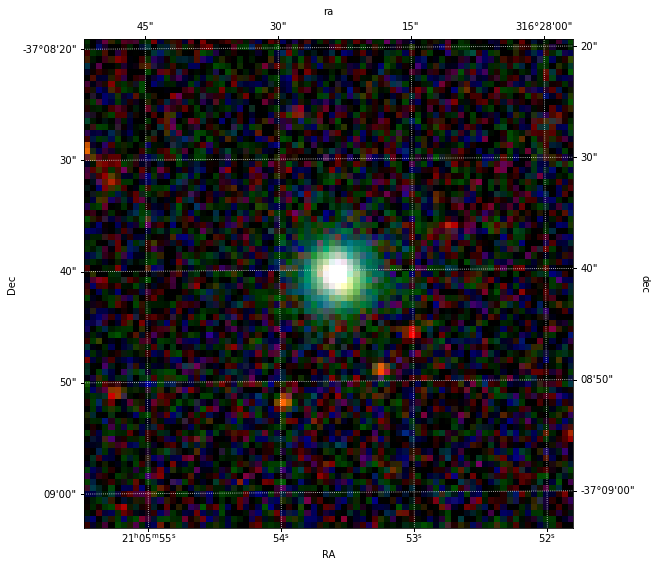

In [98]:
fig = plt.figure(figsize=(18, 9))
ax = plt.subplot(projection=wcs)
plt.imshow(img, origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')

overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')
